# Setup

In [10]:
# Path to progressive_infogan src tree
SRC_PATH = ''

# Path to saved_model_ema subdir inside of the training dir
MODEL = ''
BATCH_SIZE = 6  # Batch size the model uses.

In [11]:
import sys
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)

In [12]:
import tensorflow as tf
import numpy as np
import os
import random
import time
from matplotlib import pyplot as plt
from jonasz.lib import util
from jonasz.cifar10 import cifar10_dataset
from jonasz import constants
from jonasz.progressive_infogan import progressive_infogan_lib
from jonasz.lib import progressive_infogan_ipynb_utils
pass

In [13]:
reload(progressive_infogan_ipynb_utils)
progressive_infogan_ipynb_utils.MODELS[MODEL] = {'batch_size': BATCH_SIZE}
progressive_infogan_ipynb_utils.restart_server()

# A couple samples drawn from generator

0 20
1 10
2 1442
3 7819
4 9475
5 8807
6 8576
7 836
8 14555
9 7477
10 9628
11 26847
12 16114
13 18187
14 3902
15 16634
16 25568
17 29146
18 3155
19 21061


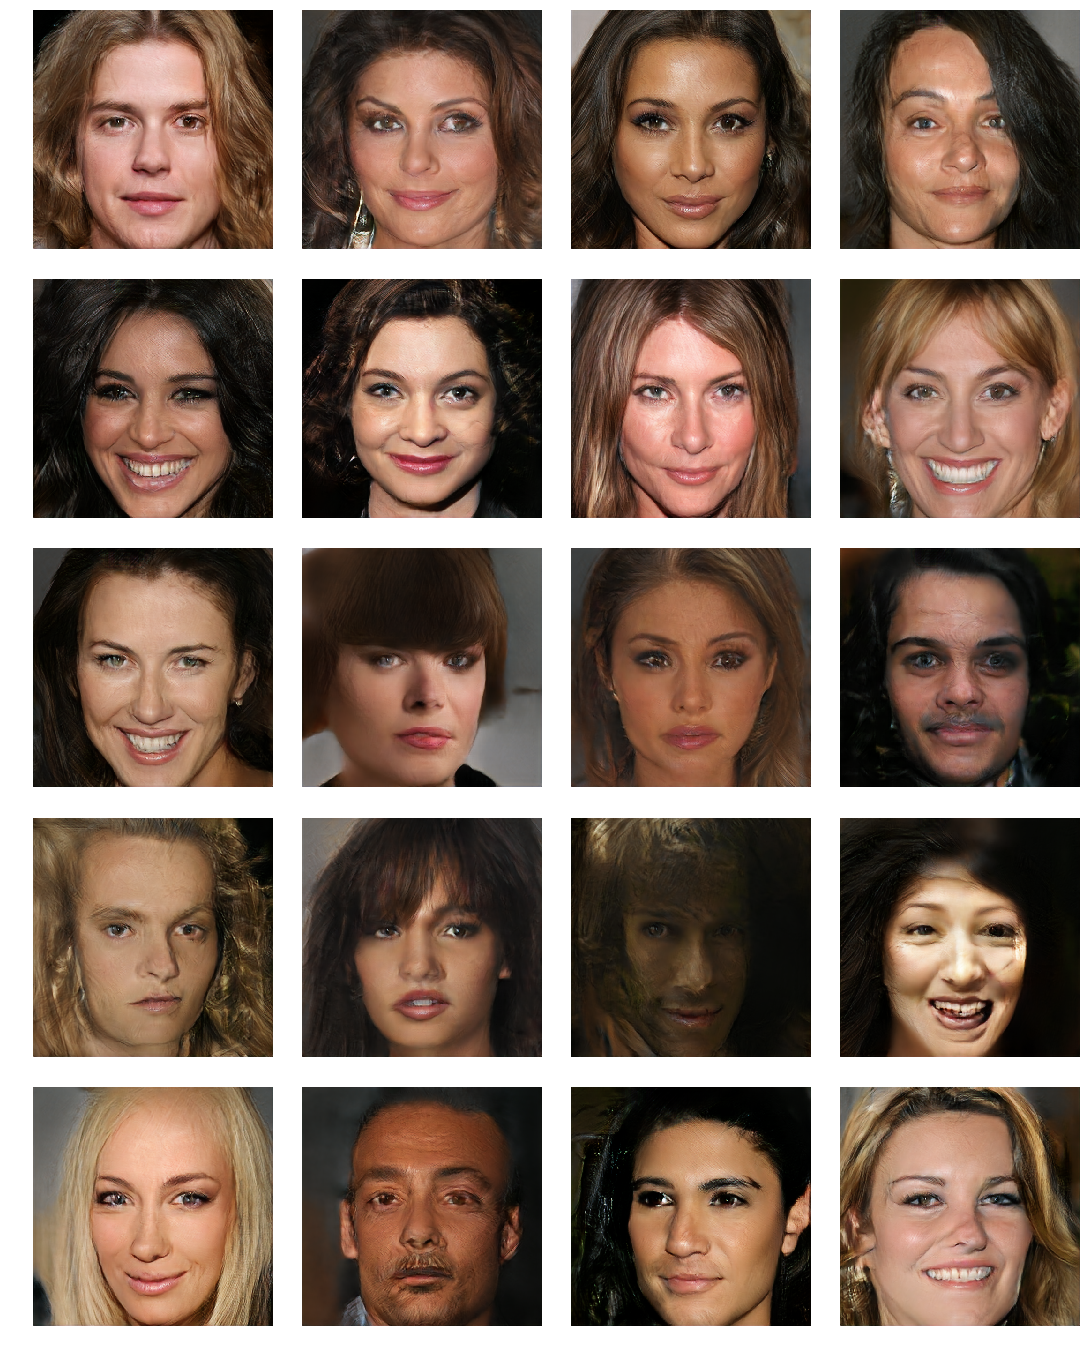

In [14]:
np.random.seed(int(time.time()))
seeds = [20, 10, 1442, 7819, 9475, 8807, 8576, 836]
seeds += list(np.random.randint(0, 30000, size=12))
gen_inputs = []
for i, s in enumerate(seeds):
    np.random.seed(s)
    print i, s
    gen_inputs.append(progressive_infogan_lib.GenInput.random(1.))

imgs = progressive_infogan_ipynb_utils.get_images(MODEL, gen_inputs)
util.show_imgs(imgs, minv=-1., maxv=1., cols=4)

# Exploring the structured input

In [ ]:
%matplotlib notebook
progressive_infogan_ipynb_utils.manual_animation(MODEL, gen_inputs[0])

# Feature summary

In [16]:
def interpolate(coord, steps=7, inputs=None):
    num_imgs = len(inputs)
    imgs = []
    for i in range(num_imgs):
        cur_line = progressive_infogan_ipynb_utils.interpolate(
            MODEL, inputs[i], coord, steps=steps
        )
        imgs += [np.concatenate(cur_line, axis=1)]
    res = np.concatenate(imgs, axis=0)
    return res

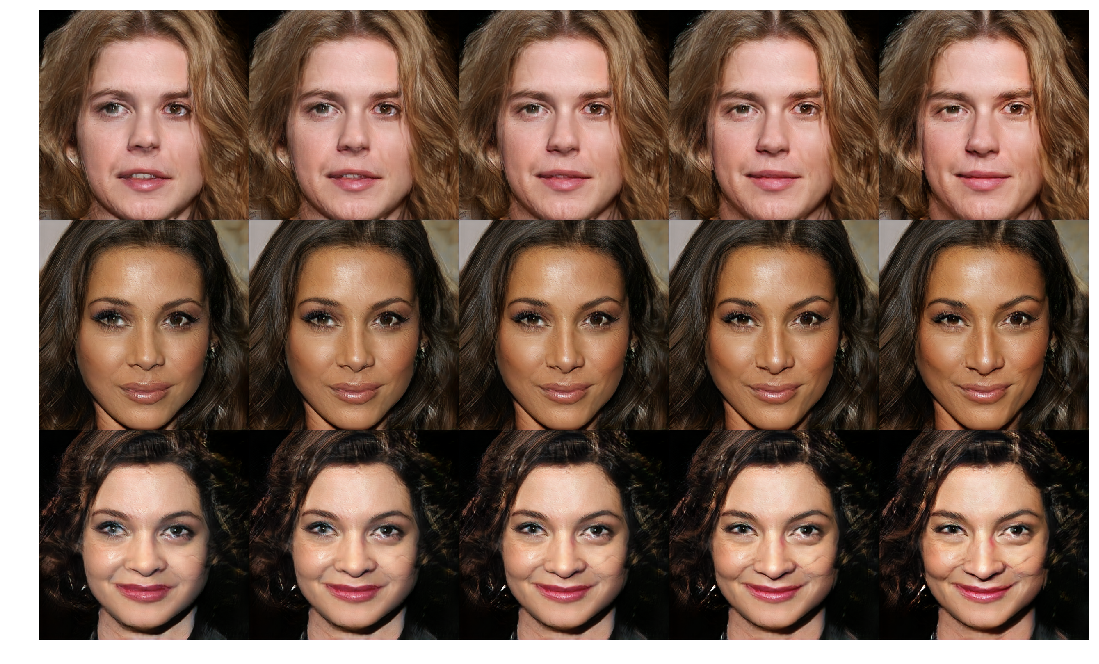

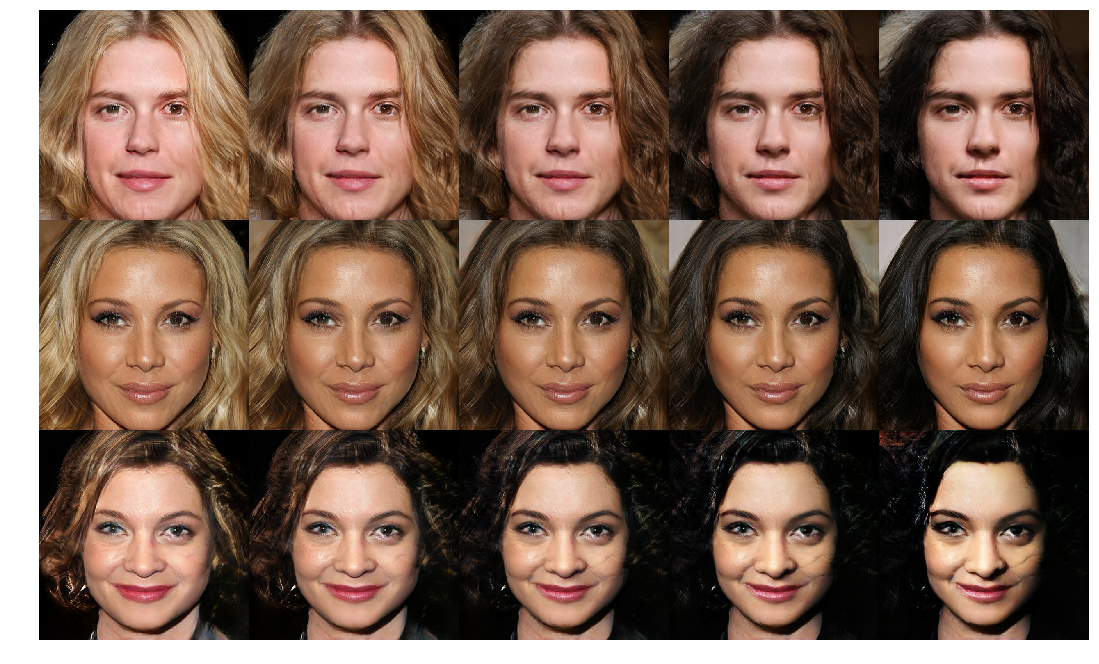

In [22]:
for x in [62, 8]:
    img = interpolate(x,
                      steps=5,
                      inputs=[gen_inputs[0], gen_inputs[2], gen_inputs[5]])
    util.show_imgs(
        img,
        minv=-1.,
        maxv=1.,
        cols=1,
    )